# Dinamic stochastic models in Python

## Forecasting non-observables

1. Load libraries

In [1]:
import sys
sys.path.append('Libraries')
import DSGE_LinearMethods as DLM
import DSGE_PreProcessing as DPP
import HandleTimeSeries as HTS
import sympy as sp
sp.init_session(use_latex=True)

IPython console for SymPy 1.11.1 (Python 3.11.5-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.11.1/



* Check Libraries below are actually needed

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

1. Procesing and solving the model

In [21]:
Mod = DPP.process_file3('MPTBolsillo.txt')
Mod = DLM.SolveModel(Mod, "Cal_MPTBolsillo.txt", True)

-> Stability conditions met

Steady state
          User supplied  Numerical
DY_eq               5.3        5.3
DYs_eq              2.1        2.1
Ds                  0.0        0.0
y                   0.0        0.0
ys                  0.0        0.0
...                 ...        ...
D4ps(+3)            2.0        2.0
D4ps(+2)            2.0        2.0
D4ps(+1)            2.0        2.0
Rs                  1.0        1.0
Rs_eq               1.0        1.0

[74 rows x 2 columns]

Policy function: Endogeous
                  DY       DYs    D4psae  D4psae(+3)  D4psae(+2)  D4psae(+1)  \
Int.       -0.090786  0.190623  0.005132   -0.014240    0.007335    0.019202   
DY_eq(-1)   1.015121  0.000000  0.002379    0.036586    0.018996    0.006849   
DYs_eq(-1)  0.038262  1.115215  0.023922    0.255303    0.152726    0.073967   
Ds(-1)     -0.001722  0.000000  0.001903    0.011903    0.008380    0.004915   
y(-1)      -1.437345  0.000000  0.048632    0.138573    0.123148    0.093314   
...    

3. Load data

In [22]:
Describ, DBobs = HTS.ReadDB_excel('DataTarea.xlsx',sheet='VarObs')

DBobs

,Dpsae,D4psae,Dpae,Dp,D4p,Meta,Dpm,ED4p,i,imn,...,ED4s,DTI,DY,EDy,g,t,Dps,Dpms,iext,DYs
2011-03-31,0.938349,1.478646,-9.068546,-2.886654,-1.018423,2.5,-2.568317,1.973611,2.716667,2.600000,...,2.206048,14.247948,-1.949311,0.277284,0.878653,-1.881677,2.465017,-4.401295,1.905434,3.4949
2011-06-30,0.948082,1.078012,6.974091,3.129094,0.077549,2.5,-3.246502,2.043056,2.450000,2.533333,...,2.517381,8.058552,9.253783,0.277284,-0.921629,-0.007617,1.244821,11.206700,1.918172,2.3957
2011-09-30,2.376302,1.230553,-0.917911,1.146859,0.286165,2.5,10.884752,2.035694,2.658333,3.746789,...,2.653328,0.603676,2.260378,0.277284,1.496454,1.858429,0.332932,5.436430,1.809630,1.7408
2011-12-31,0.760291,1.253672,11.164924,4.504825,1.434856,2.5,5.238113,2.095833,3.833333,4.113330,...,1.949309,9.016097,4.803253,1.104530,-1.268637,0.356832,3.632756,0.276668,1.549003,0.5714
2012-03-31,2.522663,1.648670,2.416276,2.482845,2.808798,2.5,-0.487067,2.306944,3.625000,3.790000,...,2.481978,-10.633712,4.734175,1.580333,0.606145,1.284875,5.823621,21.834017,1.332079,2.1883
2012-06-30,6.210784,2.948337,-6.062904,1.486297,2.396905,2.5,6.451110,2.542708,3.625000,3.786667,...,2.585911,-6.751578,6.135399,0.046771,-0.800166,0.338398,0.307520,-0.476178,1.236440,3.4364
2012-09-30,1.702565,2.778542,-4.370240,-0.558525,1.962534,2.5,0.107849,2.176181,3.000000,3.083333,...,2.103648,21.779881,0.572962,0.378954,-1.501886,-1.014657,-0.107388,2.367107,1.129029,6.9185
2012-12-31,0.309442,2.663379,11.239309,4.183451,1.884054,2.5,2.279405,2.020694,2.583333,2.603333,...,1.416412,24.949655,-0.746755,0.152993,-0.087544,0.687598,4.966040,7.165948,1.167005,4.6230
2013-03-31,0.679702,2.198863,17.721412,6.742915,2.926734,2.5,7.989428,2.476250,2.500000,2.470000,...,0.878554,34.046105,11.963825,0.435899,-2.079971,-0.113355,4.473511,24.547744,1.121834,2.1028
2013-06-30,0.035989,0.679947,9.184436,3.428611,3.415709,2.5,10.150251,2.653333,2.500000,2.486667,...,0.988413,6.958763,5.065337,0.155378,-1.256449,0.269838,3.626987,1.077006,1.301406,3.0340


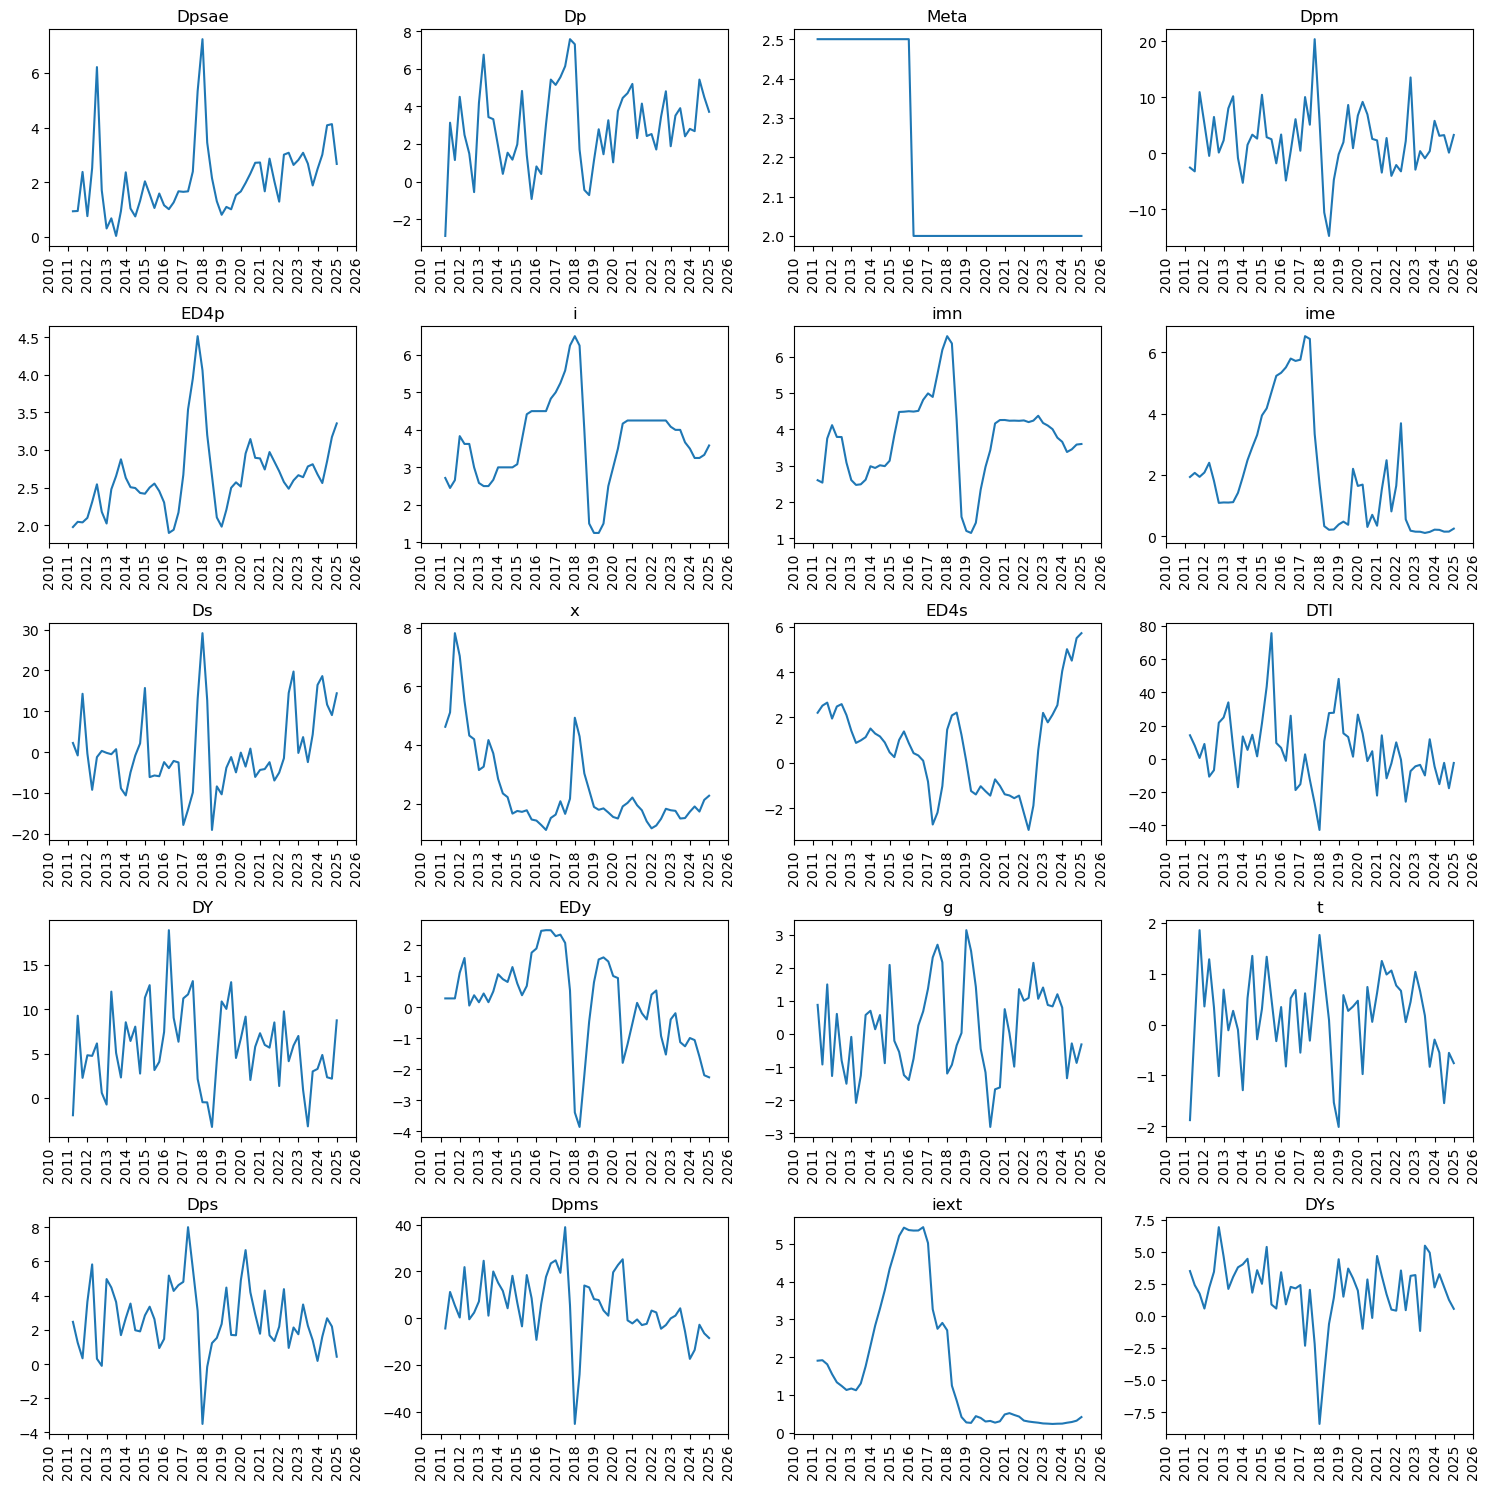

In [23]:
obsnames = DLM.sympy_to_list(Mod['StateSpaceForm']['obs_names'])
num_cols = len(obsnames)
num_rows = math.ceil(num_cols / 4)

fig, axs = plt.subplots(num_rows, 4, figsize=(15, num_rows * 3))


for idx, col in enumerate(obsnames):
    row = idx // 4
    col_idx = idx % 4
    axs[row, col_idx].plot(DBobs.index, DBobs[col], linestyle='-')
    axs[row, col_idx].set_title(col)
    axs[row, col_idx].tick_params(axis='x', rotation = 90)
    axs[row, col_idx].set_xticks(axs[row, col_idx].get_xticks()[::4])

    axs[row, col_idx].xaxis.set_major_locator(mdates.YearLocator())
    axs[row, col_idx].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

for idx in range(num_cols, num_rows * 4):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

In [24]:
DF_s, DF_u, minuslogL = DLM.KFts(DBobs, Mod, {'diffuse':False})

In [25]:
DF_s

,DY_eq,DYs_eq,Ds,y,ys,Dpae,Dp,Dp(-2),Dp(-1),D4p,...,D4s(+1),x,DQ,DQ_eq,D4ps,D4ps(+3),D4ps(+2),D4ps(+1),Rs,Rs_eq
2011-03-31,6.414821,1.136730,2.224523,1.633320,-3.119807,-7.613730,-2.886654,2.017734,1.323201,0.637684,...,-1.154280,4.619287,7.576194,0.278989,1.051797,2.112338,1.521185,1.240427,-0.124104,-0.266491
2011-06-30,6.143240,1.011332,-0.826220,2.410955,-2.773715,5.824467,3.129094,1.323201,-2.886654,0.895844,...,-0.742399,5.108833,-2.710493,-0.273204,1.060509,1.841683,1.910416,1.314430,-0.180133,-0.457910
2011-09-30,4.840286,2.211881,14.269530,1.765979,-2.891485,-0.372531,1.146859,-2.886654,3.129094,0.678125,...,5.303736,7.807242,13.455603,2.265916,0.932669,2.007171,1.609472,1.559455,-0.844862,0.472180
2011-12-31,5.290312,2.241370,-0.368599,1.644214,-3.308977,9.132456,4.504825,3.129094,1.146859,1.473531,...,3.188687,7.031673,-1.240668,1.598279,1.918882,3.357876,2.605864,2.105569,-1.755175,0.270301
2012-03-31,5.332041,2.262825,-9.237802,1.494747,-3.327609,2.433637,2.482845,1.146859,4.504825,2.815906,...,0.274045,5.496466,-5.897025,0.231335,2.758533,4.217879,4.222157,3.410120,-2.349480,0.276254
2012-06-30,4.676816,1.860642,-1.236525,1.859393,-2.933669,-4.352394,1.486297,4.504825,2.482845,2.405207,...,-3.234496,4.320159,-2.415302,-0.241708,2.524207,2.214552,2.883448,3.050388,-1.709934,0.270357
2012-09-30,4.411893,1.786921,0.287034,0.899660,-1.650775,-3.352861,-0.558525,2.482845,1.486297,1.978861,...,-2.697040,4.196147,0.738171,-0.065851,2.414127,2.195767,1.456366,2.136043,-1.923620,0.249773
2012-12-31,4.128528,2.941920,-0.193034,-0.319160,-1.230505,8.971091,4.183451,1.486297,-0.558525,1.898517,...,-0.313350,3.146190,0.589555,0.056838,2.747448,4.357298,3.297430,2.344378,-2.983997,1.053253
2013-03-31,3.809418,3.220575,-0.524593,1.719441,-1.509948,14.236053,6.742915,-0.558525,4.183451,2.963535,...,-0.501194,3.260015,-2.793997,-0.471679,2.409921,4.294589,4.469156,3.385542,-3.125810,1.378724
2013-06-30,4.203596,2.375116,0.704764,1.934876,-1.345227,7.621336,3.428611,4.183451,6.742915,3.449113,...,-0.553111,4.167135,0.903140,-0.225147,3.239788,3.800655,3.938182,4.211955,-2.578782,0.862595


In [26]:
SS = Mod['Solution']['Y0'].reshape(-1,1)


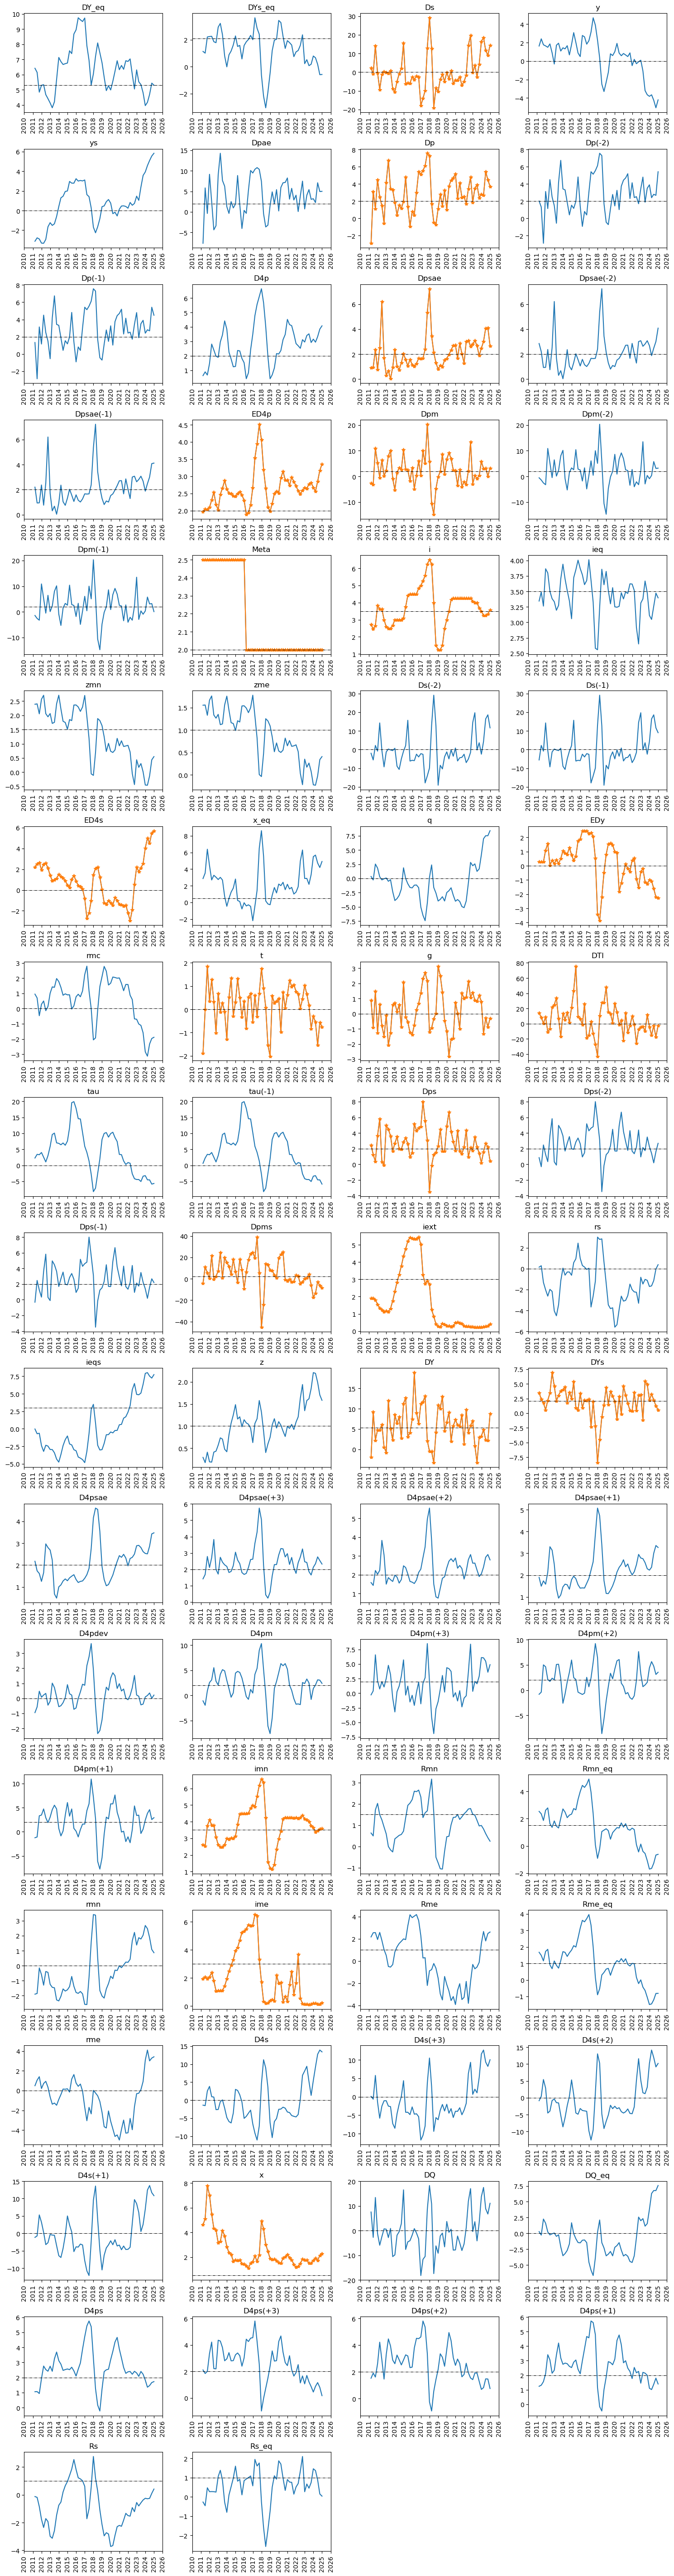

In [27]:
columns = DF_s.columns
num_cols = len(columns)
num_rows = math.ceil(num_cols / 4)

fig, axs = plt.subplots(num_rows, 4, figsize=(15, num_rows * 3))


for idx, col in enumerate(columns):
    row = idx // 4
    col_idx = idx % 4
    axs[row, col_idx].plot(DF_s.index, DF_s[col], linestyle='-')
    axs[row, col_idx].set_title(col)
    observable = False
    for obs in obsnames:
        if col == obs:
            observable = True
    if observable:
        axs[row, col_idx].plot(DF_s.index, DBobs[col], linestyle='-',marker='*')
    axs[row, col_idx].tick_params(axis='x', rotation = 90)
    axs[row, col_idx].set_xticks(axs[row, col_idx].get_xticks()[::4])

    axs[row, col_idx].axhline(y=SS[idx], color='black', linestyle='-.', linewidth=0.75)

    axs[row, col_idx].xaxis.set_major_locator(mdates.YearLocator())
    axs[row, col_idx].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

for idx in range(num_cols, num_rows * 4):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

In [10]:
Data = DF_s
Data

,DY_eq,DYs_eq,Ds,y,ys,Dpae,Dp,Dp(-2),Dp(-1),D4p,...,D4s(+1),x,DQ,DQ_eq,D4ps,D4ps(+3),D4ps(+2),D4ps(+1),Rs,Rs_eq
2011-03-31,5.316479,1.026022,2.224523,-1.343617,-3.057751,-7.613730,-2.886654,1.392573,0.864343,0.211244,...,-1.026552,4.619287,7.576194,1.319081,0.994320,2.007816,1.422548,1.155769,0.019112,-0.249140
2011-06-30,5.218372,0.887728,-0.826220,-0.334764,-2.680758,5.824467,3.129094,0.864343,-2.886654,0.624839,...,-0.905508,5.108833,-2.710493,0.578004,1.005736,1.719211,1.832842,1.247251,-0.012021,-0.428886
2011-09-30,4.094564,2.092308,14.269530,-0.793311,-2.768635,-0.372531,1.146859,-2.886654,3.129094,0.563410,...,5.107738,7.807242,13.455603,2.961025,0.900366,1.873282,1.524829,1.521474,-0.660760,0.518569
2011-12-31,4.689793,2.152345,-0.368599,-0.764946,-3.163871,9.132456,4.504825,3.129094,1.146859,1.473531,...,2.891287,7.031673,-1.240668,2.166183,1.918882,3.220140,2.518930,2.066613,-1.565476,0.351902
2012-03-31,4.861479,2.193512,-9.237802,-0.796772,-3.165174,2.433637,2.482845,1.146859,4.504825,2.815906,...,-0.063653,5.496466,-5.897025,0.694940,2.758533,4.075463,4.132363,3.369918,-2.153136,0.379839
2012-06-30,4.332831,1.793546,-1.236525,-0.346130,-2.754460,-4.352394,1.486297,4.504825,2.482845,2.405207,...,-3.512283,4.320159,-2.415302,0.136478,2.524207,2.066149,2.789955,3.008569,-1.505193,0.377179
2012-09-30,4.174078,1.720576,0.287034,-1.246409,-1.454979,-3.352861,-0.558525,2.482845,1.486297,1.978861,...,-2.954332,4.196147,0.738171,0.242798,2.414127,2.042349,1.359794,2.092889,-1.711811,0.357385
2012-12-31,3.971621,2.878273,-0.193034,-2.426003,-1.018798,8.971091,4.183451,1.486297,-0.558525,1.898517,...,-0.549145,3.146190,0.589555,0.308713,2.747448,4.199642,3.198273,2.300109,-2.766189,1.162329
2013-03-31,3.699122,3.165855,-0.524593,-0.359827,-1.284561,14.236053,6.742915,-0.558525,4.183451,2.963535,...,-0.725909,3.260015,-2.793997,-0.266143,2.409921,4.133456,4.367881,3.340360,-2.903062,1.493910
2013-06-30,4.094396,2.346001,0.704764,-0.117092,-1.112562,7.621336,3.428611,4.183451,6.742915,3.449113,...,-0.831468,4.167135,0.903140,-0.057464,3.239788,3.639238,3.836781,4.166733,-2.355521,0.997428


# Forecast

1. Unconditional

In [11]:
FH = 8
FDB = DLM.DSGEforecast0(Mod,Data,FH,'2025Q1')

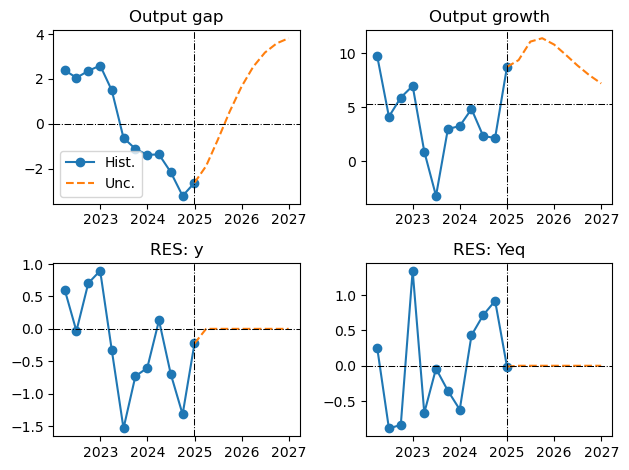

In [12]:
DBdict = {'Unc.': FDB}
lista = ['y','DY','res_y','res_DY_eq']
listanames = ['Output gap','Output growth','RES: y','RES: Yeq']
listaSS = [0,5.3,0,0]
HH = 12
Number_Rows = 2
Number_Cols = 2
fig, axs = HTS.plotTSforecast(DBdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

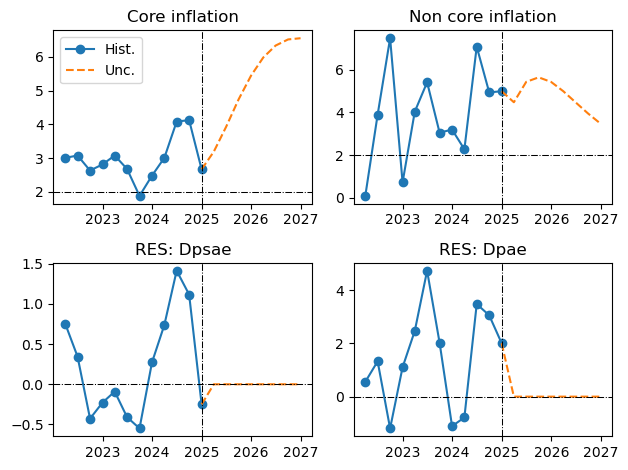

In [13]:
lista = ['Dpsae','Dpae','res_Dpsae','res_Dpae']
listanames = ['Core inflation','Non core inflation','RES: Dpsae','RES: Dpae']
listaSS = [2,2,0,0]
fig, axs = HTS.plotTSforecast(DBdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

2. Not anticipated conditional forecast

In [14]:
UCond = HTS.ReadForeCond('DataTarea_Exogenas.xlsx','2025Q1', FH)

In [15]:
print('Which are the assumptions?')
print('Unanticipated Softtunning')
print(UCond['UShock'])
print('Unanticipated Hardtunning')
print(UCond['Uvar']['var'])
print('-> Shocks to achieve hardtunning:')
print(UCond['Uvar']['shock'])

Which are the assumptions?
Unanticipated Softtunning
            res_Dps  res_ys
2025-03-31      NaN     NaN
2025-06-30      NaN     NaN
2025-09-30      NaN     NaN
2025-12-31      NaN     NaN
2026-03-31      NaN     NaN
2026-06-30      NaN     NaN
2026-09-30      NaN     NaN
2026-12-31      NaN     NaN
Unanticipated Hardtunning
            Meta      DYs      Dpae        t         g        DTI      Dps  \
2025-03-31   2.0  2.70603  4.951600 -2.30270  1.482300  -3.855870  3.43126   
2025-06-30   2.0  2.80130  0.713141 -1.03510  0.330110   7.964760  2.20562   
2025-09-30   2.0  3.02315  1.572590 -0.97944  0.036812  14.412600  1.48559   
2025-12-31   2.0  3.30235  7.941410 -1.90590 -3.670800  10.877900  1.68341   
2026-03-31   2.0  3.57135  6.833200 -0.14904 -0.229930   0.009363  3.22552   
2026-06-30   2.0  3.76469 -0.721738 -1.18960 -0.283060  -3.742000  1.07490   
2026-09-30   2.0  3.87400  0.602479 -0.92374 -0.900760  22.562300  1.47530   
2026-12-31   2.0  3.89178 -2.594830  0.92238 

In [16]:
UFDB = DLM.DSGEforecast0(Mod,Data,FH,'2025Q1',UCond)

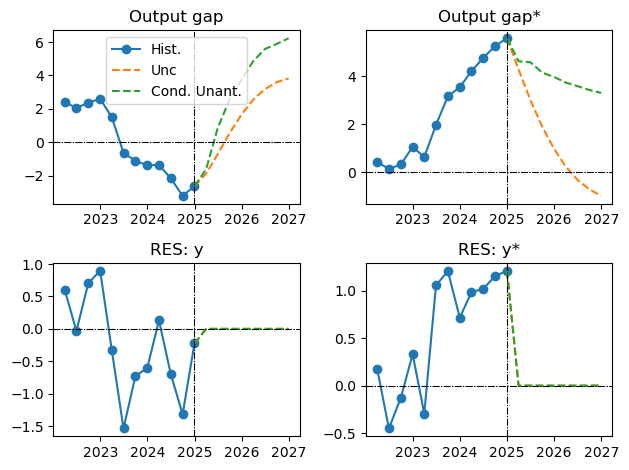

In [17]:
BDdict = {'Unc': FDB,'Cond. Unant.': UFDB}
lista = ['y','ys','res_y','res_ys']
listanames = ['Output gap','Output gap*','RES: y','RES: y*']
listaSS = [0,0,0,0]
HH = 12
Number_Rows = 2
Number_Cols = 2
fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

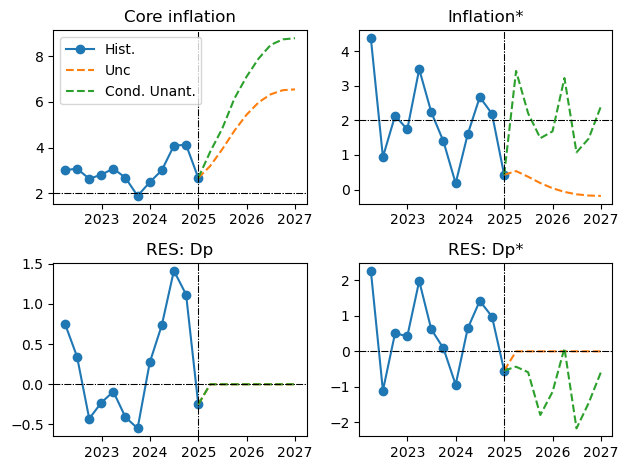

In [18]:
lista = ['Dpsae','Dps','res_Dpsae','res_Dps']
listanames = ['Core inflation','Inflation*','RES: Dp','RES: Dp*']
listaSS = [2,2,0,0]
fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

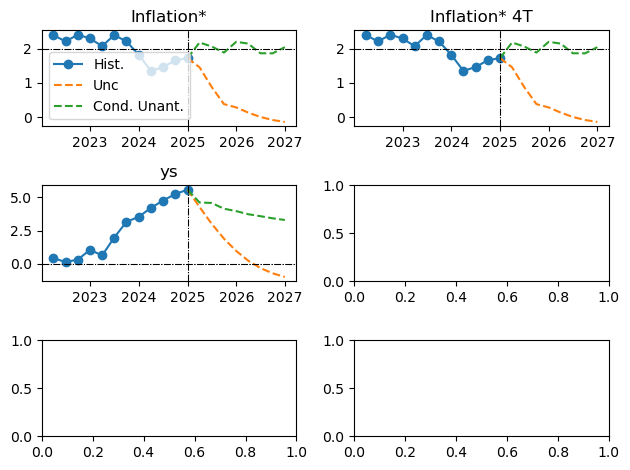

In [19]:
# Dps = bsp*Dps(-1) + (1 - bsp)*D4ps(+4) + bsy*ys(-1) + res_Dps
lista   = ['D4ps','D4ps','ys']
listaSS = [2,2,0]
listanames = ['Inflation*','Inflation* 4T','ys']

fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,3,2)

In [20]:
UFDB['Dps_uh'] = UCond['Uvar']['var']['Dps']
UFDB[['Dps','Dps_uh']].tail(10)

,Dps,Dps_uh
2024-09-30,2.194877,NaN
2024-12-31,0.427300,NaN
2025-03-31,3.431260,3.43126
2025-06-30,2.205620,2.20562
2025-09-30,1.485590,1.48559
2025-12-31,1.683410,1.68341
2026-03-31,3.225520,3.22552
2026-06-30,1.074900,1.07490
2026-09-30,1.475300,1.47530
2026-12-31,2.405710,2.40571
